<a href="https://colab.research.google.com/github/rbsie/NNProject/blob/main/bird_migration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Bird Migration Using Weather Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl
from datetime import datetime
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np



import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor


%matplotlib inline
import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms

import tensorflow as tf
from tensorflow import keras

from keras.callbacks import Callback
from keras.models import Sequential, Model
from keras.layers import InputLayer,Dense, Activation
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.utils import plot_model

In [ ]:
# updatable plot

from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();

plot_losses = PlotLosses()

# 1. Data Analysis

### Load Data

In [ ]:
# read data
full_data = pd.read_csv('Rotkehlchen_Data.csv')

# change timestamp from type object to datetime
full_data['timestamp'] = pd.to_datetime(full_data['timestamp'])
full_data.head()

,timestamp,temp_Oie,p_Oie,ppn_Oie,ws_Oie,wd_Oie,temp_DE1,p_DE1,ppn_DE1,cc_DE1,...,year,spring,month_sin,month_cos,day_sin,day_cos,day_of_year_sin,day_of_year_cos,ringing_season,count
0,1999-01-01,-1.0,1011.3,0.0,2.8,133.0,-1.6,1013.1,0.0,4.7,...,1999,1,0.5,0.866025,0.201299,0.979530,0.017166,0.999853,0.0,0.0
1,1999-01-02,0.6,1006.4,0.0,3.9,161.0,2.1,1005.5,0.1,5.7,...,1999,1,0.5,0.866025,0.394356,0.918958,0.034328,0.999411,0.0,0.0
2,1999-01-03,1.9,1002.9,0.0,4.0,179.0,3.3,1002.6,0.0,5.7,...,1999,1,0.5,0.866025,0.571268,0.820763,0.051479,0.998674,0.0,0.0
3,1999-01-04,4.5,1003.1,3.2,5.2,201.0,7.0,1003.4,1.3,8.0,...,1999,1,0.5,0.866025,0.724793,0.688967,0.068615,0.997643,0.0,0.0
4,1999-01-05,7.8,1007.3,11.3,5.6,238.0,9.9,1008.4,2.5,7.7,...,1999,1,0.5,0.866025,0.848644,0.528964,0.085731,0.996318,0.0,0.0


In [ ]:
# print all column names
for col in full_data.columns:
    print(col)

timestamp
temp_Oie
p_Oie
ppn_Oie
ws_Oie
wd_Oie
temp_DE1
p_DE1
ppn_DE1
cc_DE1
ws_DE1
wd_DE1
temp_DE2
p_DE2
ppn_DE2
cc_DE2
ws_DE2
wd_DE2
temp_DE3
p_DE3
ppn_DE3
cc_DE3
ws_DE3
wd_DE3
temp_DE4
p_DE4
ppn_DE4
cc_DE4
ws_DE4
wd_DE4
temp_DE5
p_DE5
ppn_DE5
cc_DE5
ws_DE5
wd_DE5
temp_DE6
p_DE6
ppn_DE6
cc_DE6
ws_DE6
wd_DE6
temp_PL1
ppn_PL1
ws_PL1
cc_PL1
p_PL1
wd_PL1
temp_PL2
ppn_PL2
ws_PL2
cc_PL2
p_PL2
wd_PL2
temp_PL3
ppn_PL3
ws_PL3
cc_PL3
p_PL3
wd_PL3
temp_PL4
ppn_PL4
ws_PL4
cc_PL4
p_PL4
wd_PL4
temp_PL5
ppn_PL5
ws_PL5
cc_PL5
p_PL5
wd_PL5
p_DK
wd_DK
ws_DK
temp_DK
temp_SE2
ppn_SE2
p_SE2
wd_SE2
ws_SE2
temp_SE1
ppn_SE1
p_SE1
wd_SE1
ws_SE1
temp_LV
ppn_LV
p_LV
ws_LV
wd_LV
year
spring
month_sin
month_cos
day_sin
day_cos
day_of_year_sin
day_of_year_cos
ringing_season
count


Let's see how the 'spring' column is defined

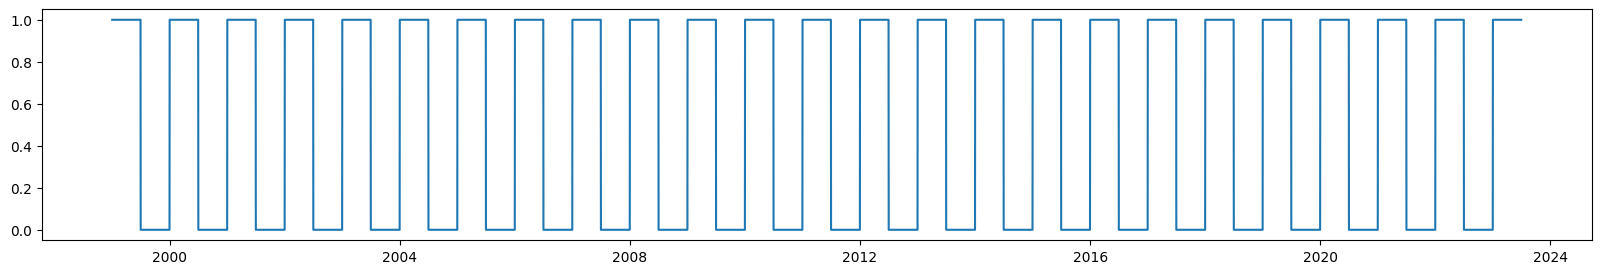

In [ ]:
plt.figure(figsize=(20,3))
plt.plot(full_data['timestamp'],full_data['spring'])

From the plot, we can see that 'spring' defines the first half of the year. Therefore, we will assume that spring == 0 means 'autumn'.

In [ ]:
print('Number of rows:', full_data.shape[0])
print('Number of columns:', full_data.shape[1])

Number of rows: 8947
Number of columns: 101


For the project, we will only consider these variables:

- temp_Oie = Temperature
- p_Oie = Pressure
- ppn_Oie = Rain
- ws_Oie = Wind Speed
- wd_Oie = Wind Direction

as well as date features. Let's have a look at their ranges:

In [ ]:
print('Range of temp_Oie:', full_data['temp_Oie'].min(), ' to ', full_data['temp_Oie'].max())
print('Range of p_Oie:', full_data['p_Oie'].min(), ' to ', full_data['p_Oie'].max())
print('Range of ppn_Oie:', full_data['ppn_Oie'].min(), ' to ', full_data['ppn_Oie'].max())
print('Range of ws_Oie:', full_data['ws_Oie'].min(), ' to ', full_data['ws_Oie'].max())
print('Range of wd_Oie:', full_data['wd_Oie'].min(), ' to ', full_data['wd_Oie'].max())

Range of temp_Oie: -12.0  to  24.7
Range of p_Oie: 972.8  to  1045.4
Range of ppn_Oie: 0.0  to  67.3
Range of ws_Oie: 0.0  to  20.9
Range of wd_Oie: 14.0  to  355.0


The ranges look valid (there are no inf values).

The wind direction is given in degrees (°). Therefore, we will use the cyclic features wd_Oie_sin, wd_Oie_cos.

In [ ]:
rad = np.deg2rad(full_data['wd_Oie'])
full_data['wd_Oie_sin'] = np.sin(rad)
full_data['wd_Oie_cos'] = np.cos(rad)

The goal is to predict bird counts (count) one day ahead, so we will add 'cound_next' as a target feature.

In [ ]:
full_data['count_next'] = full_data['count'].shift(-1)
full_data['count_lag1'] = full_data['count'].shift(1)
full_data['count_lag2'] = full_data['count'].shift(2)
full_data['count_lag3'] = full_data['count'].shift(3)
full_data['count_lag4'] = full_data['count'].shift(4)
full_data['count_lag5'] = full_data['count'].shift(5)

In [ ]:
weather_features = [
    "temp_Oie",
    "p_Oie",
    "ppn_Oie",
    "ws_Oie",
    "wd_Oie_sin",
    "wd_Oie_cos"
]

date_features = [
    "year",
    "spring",
    "month_sin",
    "month_cos",
    "day_of_year_sin",
    "day_of_year_cos"
]

lagged_target = [
    "count_lag1",
    "count_lag2",
    "count_lag3",
    "count_lag4",
    "count_lag5",
]

feature_cols = weather_features + date_features
target_col = ['count_next']

data = full_data[feature_cols + target_col + lagged_target][5:-1] #drop last entry
data.head()

,temp_Oie,p_Oie,ppn_Oie,ws_Oie,wd_Oie_sin,wd_Oie_cos,year,spring,month_sin,month_cos,day_of_year_sin,day_of_year_cos,count_next,count_lag1,count_lag2,count_lag3,count_lag4,count_lag5
5,10.2,1003.0,1.2,7.9,-0.766044,-0.642788,1999,1,0.5,0.866025,0.102821,0.994700,0.0,0.0,0.0,0.0,0.0,0.0
6,4.6,997.0,0.8,6.4,-0.996195,-0.087156,1999,1,0.5,0.866025,0.119881,0.992788,0.0,0.0,0.0,0.0,0.0,0.0
7,2.5,997.6,2.0,3.0,0.694658,-0.719340,1999,1,0.5,0.866025,0.136906,0.990584,0.0,0.0,0.0,0.0,0.0,0.0
8,0.1,1004.2,0.1,5.2,0.970296,0.241922,1999,1,0.5,0.866025,0.153891,0.988088,0.0,0.0,0.0,0.0,0.0,0.0
9,-1.7,1015.4,0.0,1.4,-0.469472,-0.882948,1999,1,0.5,0.866025,0.170830,0.985301,0.0,0.0,0.0,0.0,0.0,0.0


### Visualization of Data

Now let's have a look at our data. Let's look at the distribution of our target variable:

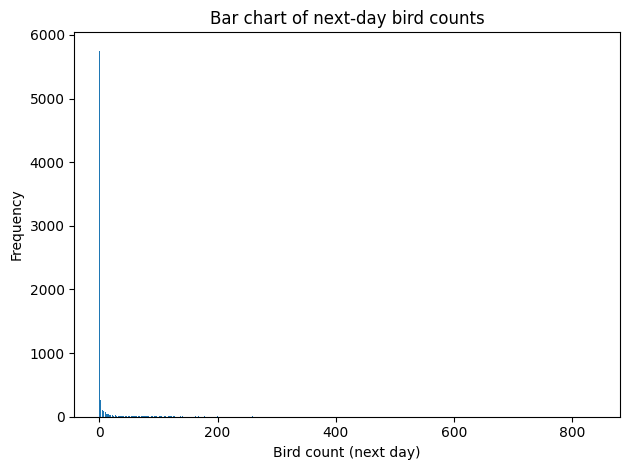

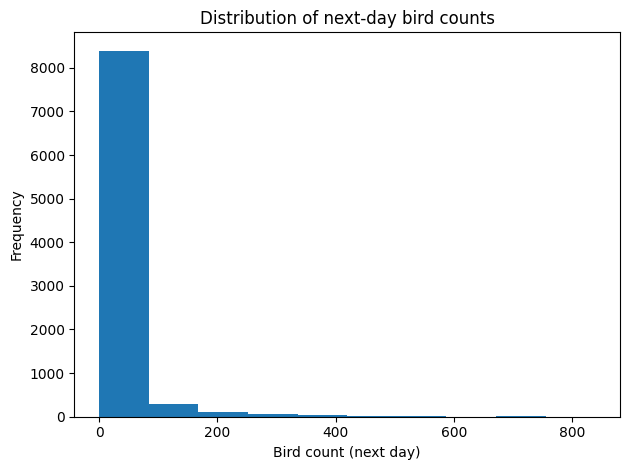

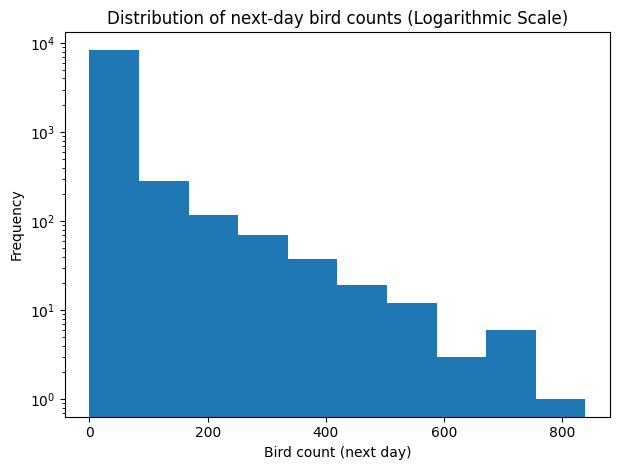

<Axes: xlabel='count_next', ylabel='Density'>

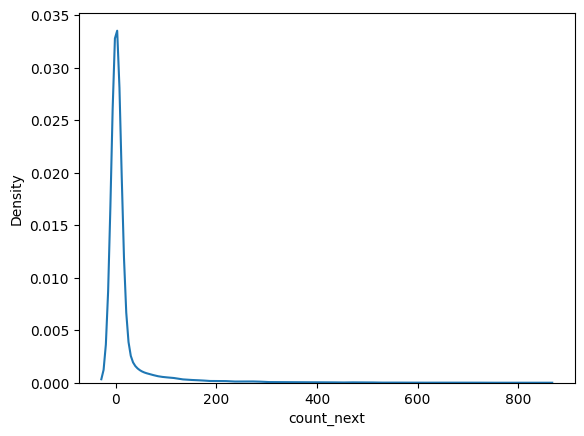

In [ ]:
# bar chart of next-day counts
counts = data['count_next'].value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.xlabel("Bird count (next day)")
plt.ylabel("Frequency")
plt.title("Bar chart of next-day bird counts")
plt.tight_layout()
plt.show()

# histogram of Distribution of next-day bird counts
plt.hist(data['count_next'])
plt.xlabel('Bird count (next day)')
plt.ylabel('Frequency')
plt.title('Distribution of next-day bird counts')
plt.tight_layout()
plt.show()

# logarithmic scale
plt.hist(data['count_next'])
plt.xlabel('Bird count (next day)')
plt.ylabel('Frequency')
plt.title('Distribution of next-day bird counts (Logarithmic Scale)')
plt.tight_layout()
plt.yscale("log")
plt.show()

# kernal density estimation
vals = data['count_next']
sns.kdeplot(vals)

As we can see, the data is highly skewed, with a majority of values of count_next being 0.

Now look at the time dependence of count_next:

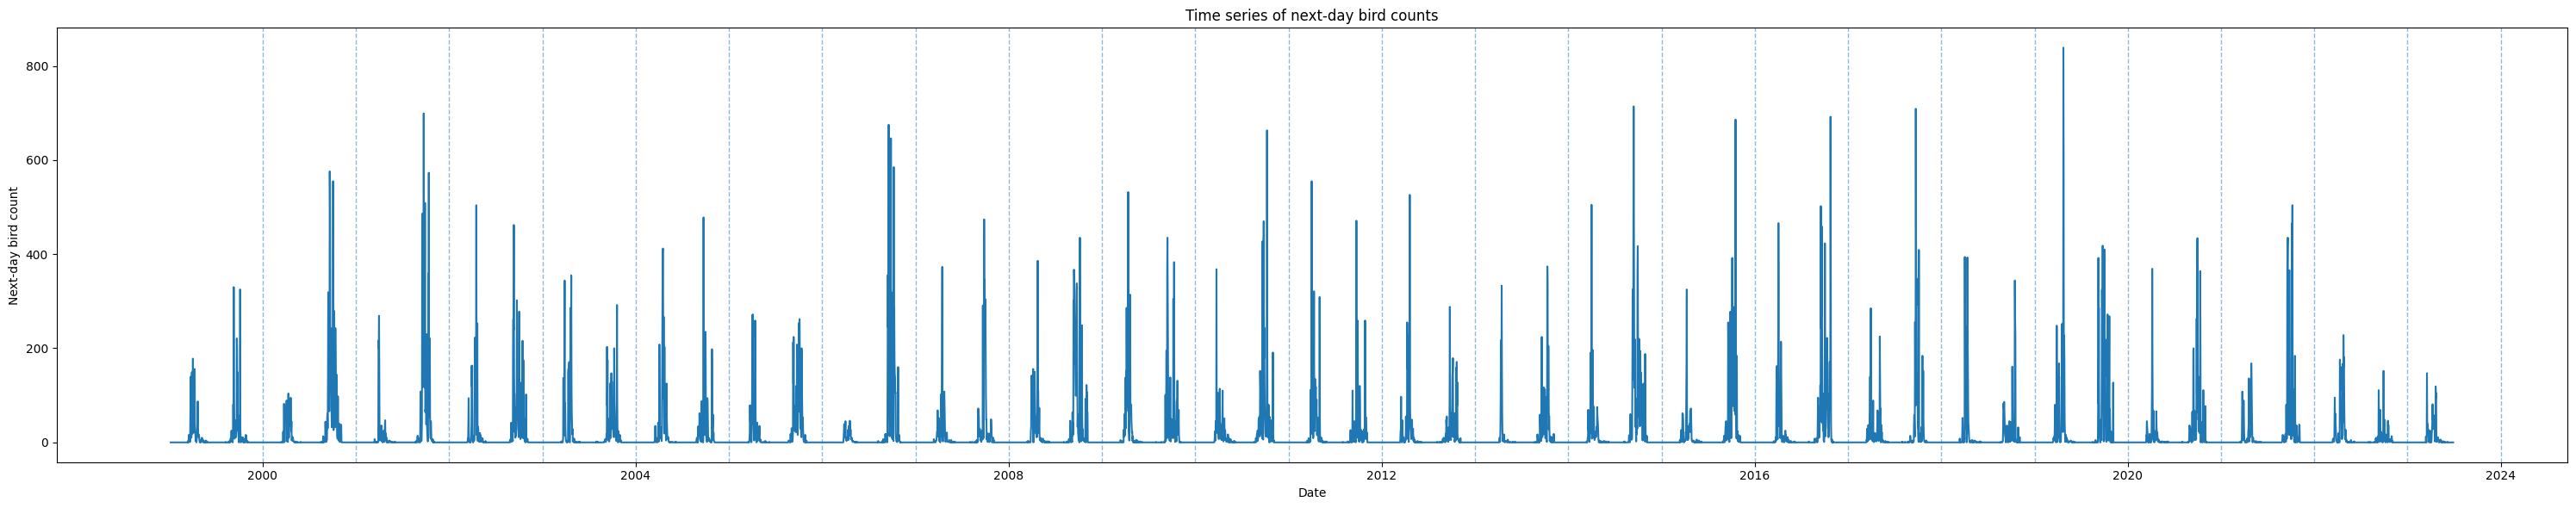

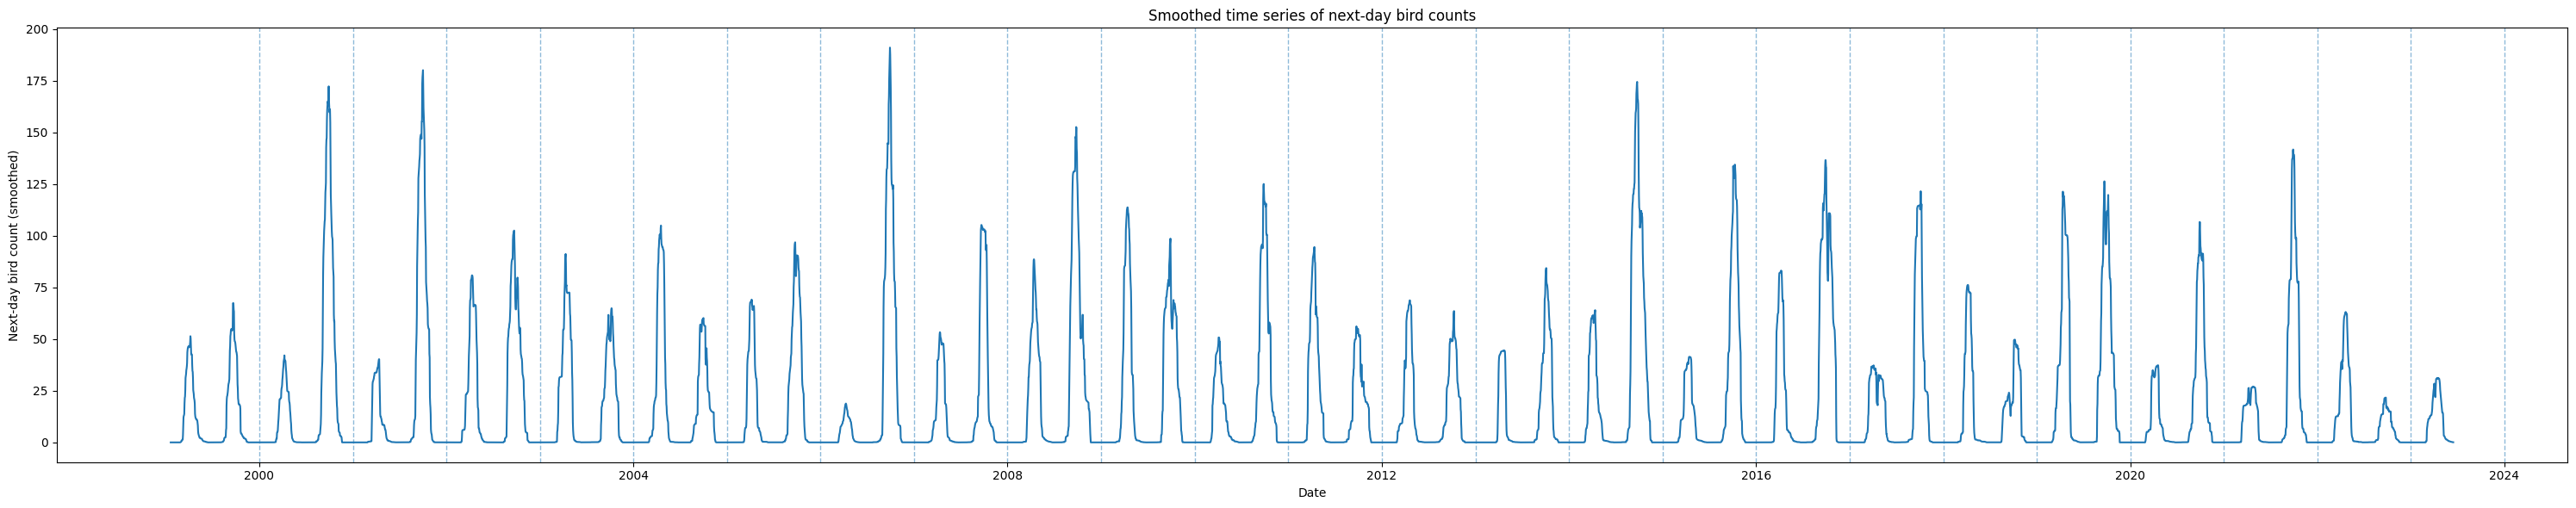

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(full_data["timestamp"][5:-1], data["count_next"])
plt.xlabel("Date")
plt.ylabel("Next-day bird count")
plt.title("Time series of next-day bird counts")
plt.tight_layout()
for y_spring in range(2000, 2025):
    plt.axvline(pd.Timestamp(f"{y_spring}-01-01"), linestyle="--", linewidth=1, alpha=0.5)
plt.show()

# rolling mean
smoothed = data["count_next"].rolling(window=30, center=True).mean()

plt.figure(figsize=(30,6))
plt.plot(full_data["timestamp"][5:-1], smoothed)
plt.xlabel("Date")
plt.ylabel("Next-day bird count (smoothed)")
plt.title("Smoothed time series of next-day bird counts")
plt.tight_layout()
for y_spring in range(2000, 2025):
    plt.axvline(pd.Timestamp(f"{y_spring}-01-01"), linestyle="--", linewidth=1, alpha=0.5)
plt.show()

There seems to be a yearly seasonality, with 2 peaks: one in spring, one in autumn. For most years, the autumn peak is higher.

<Figure size 2000x500 with 0 Axes>

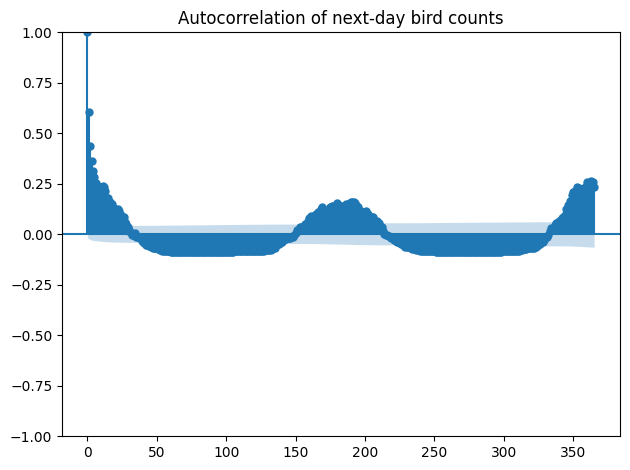

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(20,5))
plot_acf(data["count_next"], lags=365)
plt.title("Autocorrelation of next-day bird counts")
plt.tight_layout()
plt.show()

Here we can see:

- Strong positive autocorrelation at very small lags, meaning consecutive days are similar
- Autocorrelation drops toward zero around lag ~40
- A positive bump around lag ~180 → mid-year shows similar values (half-year structure)
- Another rise toward lag ~360 → the series repeats annually/values around the same day of the year look alike.

Now let's look at how the variables correlate between each other.

<Axes: >

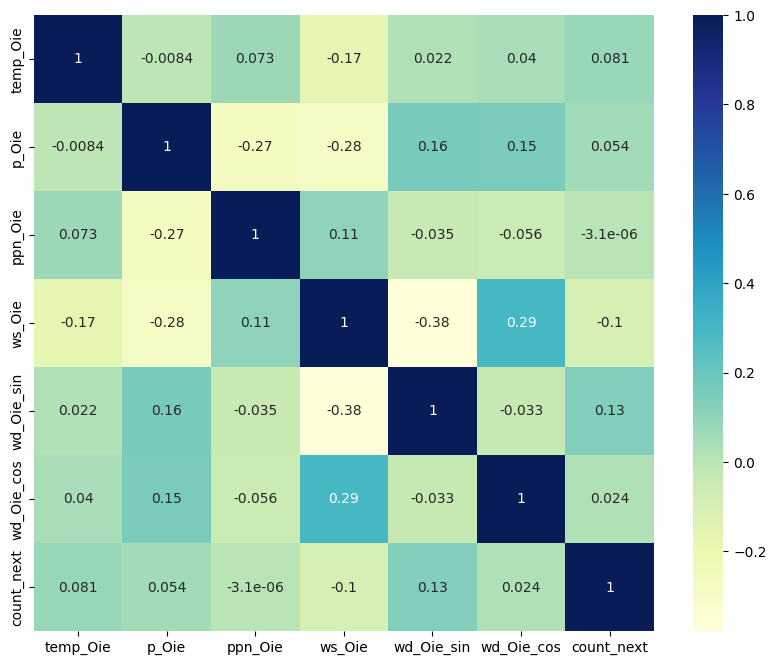

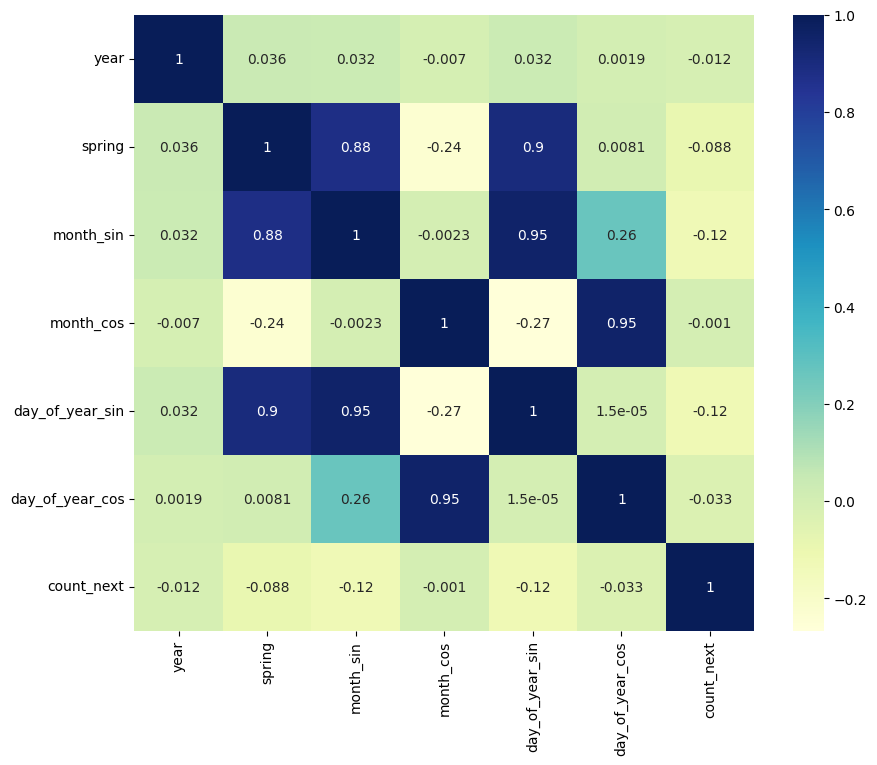

In [ ]:
# correlation heatmap
# weather features and target
fig = plt.figure(figsize=(10, 8))
sns.heatmap(data[weather_features+target_col].corr(), cmap="YlGnBu", annot=True)

# date features and target
fig = plt.figure(figsize=(10, 8))
sns.heatmap(data[date_features+target_col].corr(), cmap="YlGnBu", annot=True)

There is no variable that highly correlates with count_next. For the weather features, the variable wd_Oie_sin has the largest correlation and month_sin and day_of_year_sin for date features.

# Benchmark Model

We will create a multivariate linear regression model for both spring and autumn data as a baseline.

In [ ]:
features = [
    "temp_Oie",
    "p_Oie",
    "ppn_Oie",
    "ws_Oie",
    "wd_Oie_sin",
    "wd_Oie_cos",
    "year",
    "month_sin",
    "month_cos",
    "day_of_year_sin",
    "day_of_year_cos",
    "count_lag1",
    "count_lag2",
    "count_lag3",
    "count_lag4",
    "count_lag5"
]

### Spring

In [ ]:
data_spring = data[data["spring"] == 1].copy() # data with spring TRUE

X_spring = data_spring[features].values
y_spring = data_spring["count_next"].values

# train test split 80/20
split = int(len(data_spring) * 0.8)
X_train, X_test = X_spring[:split], X_spring[split:]
y_train, y_test = y_spring[:split], y_spring[split:]

# linear regression modell
model = LinearRegression()
model.fit(X_train, y_train)

# prediction
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# metrics
r2_train = r2_score(y_pred_train,np.array(y_train))
r2_test=r2_score(y_pred_test,np.array(y_test))

rmse_train=np.sqrt(mean_squared_error(y_pred_train,np.array(y_train)))
rmse_test=np.sqrt(mean_squared_error(y_pred_test,np.array(y_test)))

rmse_perc_train=rmse_train/np.mean(np.array(y_train))
rmse_perc_test=rmse_test/np.mean(np.array(y_test))

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"\n=== Linear Regression Benchmark — 'Spring' ===")
print(f"MAE Test :  {mae_test:.2f}")
print(f"RMSE Test:  {rmse_test:.2f}")
print(f"R² Test  :  {r2_test:.3f}")


=== Linear Regression Benchmark — 'Spring' ===
MAE Test :  15.71
RMSE Test:  42.94
R² Test  :  0.177


### Autumn

In [ ]:
data_autumn = data[data["spring"] == 0].copy() # data with spring FALSE

X_autumn = data_autumn[features].values
y_autumn = data_autumn["count_next"].values

# train test split 80/20
split = int(len(data_autumn) * 0.8)
X_train, X_test = X_autumn[:split], X_autumn[split:]
y_train, y_test = y_autumn[:split], y_autumn[split:]

# linear regression modell
model = LinearRegression()
model.fit(X_train, y_train)

# prediction
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# metrics
r2_train = r2_score(y_pred_train,np.array(y_train))
r2_test=r2_score(y_pred_test,np.array(y_test))

rmse_train=np.sqrt(mean_squared_error(y_pred_train,np.array(y_train)))
rmse_test=np.sqrt(mean_squared_error(y_pred_test,np.array(y_test)))

rmse_perc_train=rmse_train/np.mean(np.array(y_train))
rmse_perc_test=rmse_test/np.mean(np.array(y_test))

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"\n=== Linear Regression Benchmark — 'Autumn' ===")
print(f"MAE Test :  {mae_test:.2f}")
print(f"RMSE Test:  {rmse_test:.2f}")
print(f"R² Test  :  {r2_test:.3f}")


=== Linear Regression Benchmark — 'Autumn' ===
MAE Test :  29.52
RMSE Test:  56.34
R² Test  :  0.200


# Neural Network

Next, we will build and train a neural network for forecasting.

### Spring

In [ ]:
X_spring = data_spring[features]
y_spring = data_spring["count_next"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_spring, y_spring, test_size=0.2, random_state=42)

# Standardize the features
Xscaler = StandardScaler()
X_train = Xscaler.fit_transform(X_train)
X_test = Xscaler.transform(X_test)

# Standardize the target
Yscaler = StandardScaler()
y_train_sc = Yscaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test_sc = Yscaler.transform(np.array(y_test).reshape(-1,1))

print("Input Shape (Train):", X_train.shape)
print("Input Shape (Test):",X_test.shape)

print("Target Shape (Train)",y_train_sc.shape)
print("Target Shape (Test):",y_test_sc.shape)

Input Shape (Train): (3620, 16)
Input Shape (Test): (905, 16)
Target Shape (Train) (3620, 1)
Target Shape (Test): (905, 1)


## Model

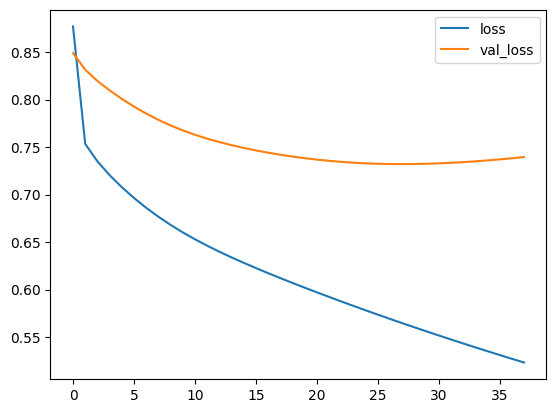

In [ ]:
tf.random.set_seed(42)

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dropout

# early stopping
early_stop = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )

model = Sequential()
model.add(InputLayer(input_shape=(len(features),)))
# model.add(Dense(500,activation='tanh',use_bias=True))
# model.add(Dropout(0.2))
# model.add(Dense(300,activation='tanh',use_bias=True))
# model.add(Dropout(0.2))
# model.add(Dense(10,activation='tanh',use_bias=True))
# model.add(Dense(1,use_bias=True))

model.add(Dense(64,activation='tanh',use_bias=True))
model.add(Dense(32,activation='tanh',use_bias=True))
model.add(Dense(1,use_bias=True))

# optimizer
opt = Adam(learning_rate=0.0005)

model.compile(loss="mse", optimizer=opt)

model.fit(
    X_train, y_train_sc,
    validation_data=(X_test, y_test_sc),
    shuffle=False,
    epochs=200,
    batch_size=64,
    verbose=0,
    callbacks=[early_stop, plot_losses]
)

In [ ]:
y_pred_train_sc = model.predict(X_train)
y_pred_test_sc = model.predict(X_test)

# Inverse transform to get the predicted values back to the original scale
y_pred_train_original = Yscaler.inverse_transform(y_pred_train_sc)
y_pred_test_original = Yscaler.inverse_transform(y_pred_test_sc)

# metrics
r2_train=r2_score(y_pred_train_original,np.array(y_train))
r2_test=r2_score(y_pred_test_original,np.array(y_test))

rmse_train=np.sqrt(mean_squared_error(y_pred_train_original,np.array(y_train)))
rmse_test=np.sqrt(mean_squared_error(y_pred_test_original,np.array(y_test)))

rmse_perc_train=rmse_train/np.mean(np.array(y_train))
rmse_perc_test=rmse_test/np.mean(np.array(y_test))

mae_test = mean_absolute_error(y_pred_test_original, np.array(y_test))
rmse_test = np.sqrt(mean_squared_error(y_pred_test_original, np.array(y_test)))
r2_test = r2_score(np.array(y_test), y_pred_test_original)

print(f"\n=== Neural Network — 'Spring' ===")
print(f"MAE Test :  {mae_test:.2f}")
print(f"RMSE Test:  {rmse_test:.2f}")
print(f"R² Test  :  {r2_test:.3f}")

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step

=== Neural Network — 'Spring' ===
MAE Test :  21.64
RMSE Test:  50.41
R² Test  :  0.399


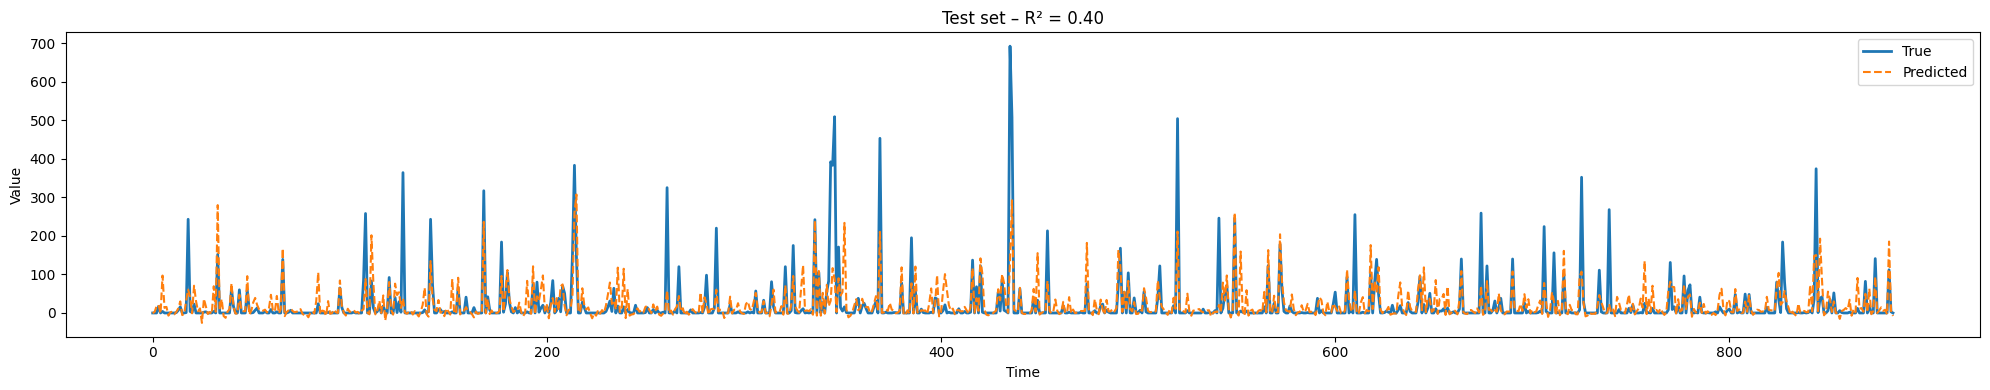

In [ ]:
import matplotlib.pyplot as plt

y_true = np.array(y_test).ravel()
y_pred = y_pred_test_original.ravel()

plt.figure(figsize=(20,4))
plt.plot(y_true, label="True", linewidth=2)
plt.plot(y_pred, label="Predicted", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Test set – R² = {r2_test:.2f}")
plt.legend()
plt.tight_layout()
plt.show()


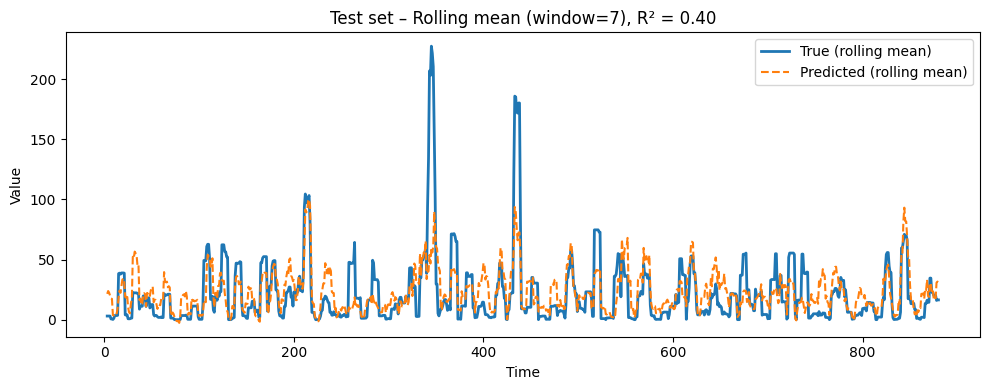

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

window = 7  # anpassen

y_true = pd.Series(np.array(y_test).ravel())
y_pred = pd.Series(y_pred_test_original.ravel())

y_true_rm = y_true.rolling(window, center=True).mean()
y_pred_rm = y_pred.rolling(window, center=True).mean()

plt.figure(figsize=(10,4))
plt.plot(y_true_rm, label="True (rolling mean)", linewidth=2)
plt.plot(y_pred_rm, label="Predicted (rolling mean)", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Test set – Rolling mean (window={window}), R² = {r2_test:.2f}")
plt.legend()
plt.tight_layout()
plt.show()


### Autumn

In [ ]:
X_autumn = data_autumn[features]
y_autumn = data_autumn["count_next"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_autumn, y_autumn, test_size=0.2, random_state=42)

# Standardize the features
Xscaler = StandardScaler()
X_train = Xscaler.fit_transform(X_train)
X_test = Xscaler.transform(X_test)

# Standardize the target
Yscaler = StandardScaler()
y_train_sc = Yscaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test_sc = Yscaler.transform(np.array(y_test).reshape(-1,1))

print("Input Shape (Train):", X_train.shape)
print("Input Shape (Test):",X_test.shape)

print("Target Shape (Train)",y_train_sc.shape)
print("Target Shape (Test):",y_test_sc.shape)

Input Shape (Train): (3532, 16)
Input Shape (Test): (884, 16)
Target Shape (Train) (3532, 1)
Target Shape (Test): (884, 1)


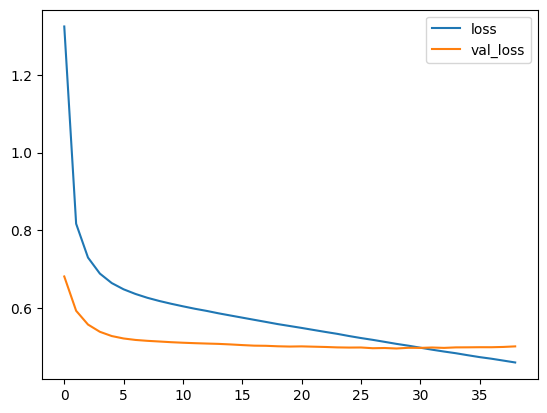

In [ ]:
tf.random.set_seed(42)

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dropout

# early stopping
early_stop = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )

model = Sequential()
model.add(InputLayer(input_shape=(len(features),)))
model.add(Dense(64,activation='relu',use_bias=True))
model.add(Dense(32,activation='relu',use_bias=True))
model.add(Dense(1,use_bias=True))

# optimizer
opt = Adam(learning_rate=0.0005)

model.compile(loss="mse", optimizer=opt)

model.fit(
    X_train, y_train_sc,
    validation_data=(X_test, y_test_sc),
    shuffle=True,
    epochs=200,
    batch_size=64,
    verbose=0,
    callbacks=[early_stop, plot_losses]
)

In [ ]:
y_pred_train_sc = model.predict(X_train)
y_pred_test_sc = model.predict(X_test)

# Inverse transform to get the predicted values back to the original scale
y_pred_train_original = Yscaler.inverse_transform(y_pred_train_sc)
y_pred_test_original = Yscaler.inverse_transform(y_pred_test_sc)

# metrics
r2_train=r2_score(y_pred_train_original,np.array(y_train))
r2_test=r2_score(y_pred_test_original,np.array(y_test))

rmse_train=np.sqrt(mean_squared_error(y_pred_train_original,np.array(y_train)))
rmse_test=np.sqrt(mean_squared_error(y_pred_test_original,np.array(y_test)))

rmse_perc_train=rmse_train/np.mean(np.array(y_train))
rmse_perc_test=rmse_test/np.mean(np.array(y_test))

mae_test = mean_absolute_error(y_pred_test_original, np.array(y_test))
rmse_test = np.sqrt(mean_squared_error(y_pred_test_original, np.array(y_test)))
r2_test = r2_score(np.array(y_test), y_pred_test_original)

print(f"\n=== Neural Network — 'Autumn' ===")
print(f"MAE Test :  {mae_test:.2f}")
print(f"RMSE Test:  {rmse_test:.2f}")
print(f"R² Test  :  {r2_test:.3f}")

NameError: name 'model' is not defined

# Feature Analysis